In [2]:
# Data Manipulatoin
import pandas as pd
import numpy as np
import json

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt


# Operating System
import os

# Model Development
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.metrics import (precision_recall_curve, precision_recall_fscore_support, roc_curve, roc_auc_score,
                             f1_score, auc, accuracy_score, confusion_matrix,fbeta_score,classification_report)

# Convenience
from tqdm import tqdm

# Configuration
from medicalbiasdetection import utils


# Notebook Operations
pd.set_option('display.max_rows', 250)
pd.set_option('display.max_columns', 250)
import warnings
warnings.filterwarnings("ignore")

config = utils.read_yaml()

# Global Variables
RUN = 1
RANDOM_STATE = 0


LOG_DIR = config['LOG']['dir'].format(RUN=RUN)
LOG_PATH = config['LOG']['path'].format(RUN=RUN)
os.environ['LOG_PATH'] = LOG_PATH
os.environ['RUN'] = str(RUN)


from medicalbiasdetection import model as md
from medicalbiasdetection import visualize as viz
from medicalbiasdetection import cohort
from medicalbiasdetection import process

## Confusion Matrix and ROC_AUC Plots

  0%|          | 0/3 [00:00<?, ?it/s]

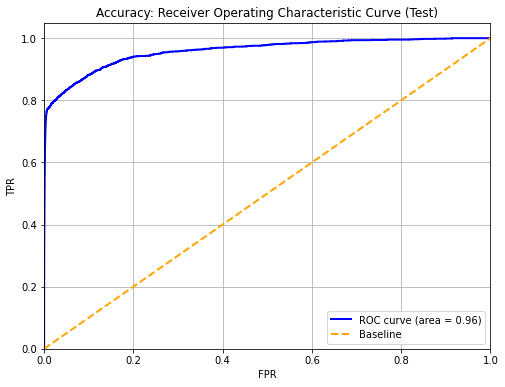

Confusion matrix : 
 [[  1328    393]
 [  3493 459994]]
Outcome values :  
TP:  1328 
FN:  393 
FP:  3493 
TN:  459994
Classification report : 
               precision    recall  f1-score   support

           1     0.2755    0.7716    0.4060      1721
           0     0.9991    0.9925    0.9958    463487

    accuracy                         0.9916    465208
   macro avg     0.6373    0.8821    0.7009    465208
weighted avg     0.9965    0.9916    0.9936    465208



Accuracy=0.992
Precision=0.275
Recall=0.772
F1 Score=0.406
F2 Score=0.567


 33%|███▎      | 1/3 [00:03<00:07,  3.89s/it]

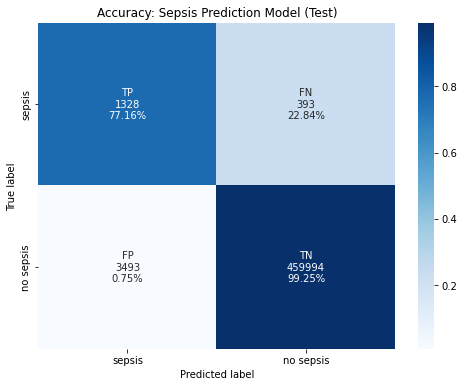

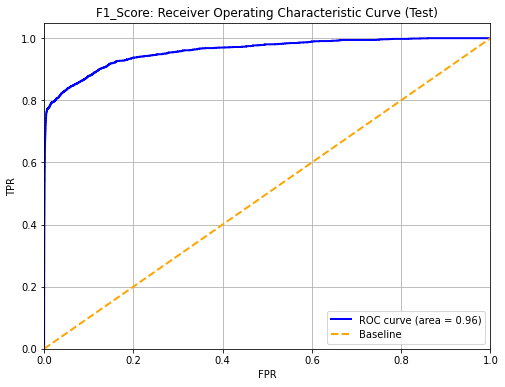

Confusion matrix : 
 [[  1328    393]
 [  3512 459975]]
Outcome values :  
TP:  1328 
FN:  393 
FP:  3512 
TN:  459975
Classification report : 
               precision    recall  f1-score   support

           1     0.2744    0.7716    0.4048      1721
           0     0.9991    0.9924    0.9958    463487

    accuracy                         0.9916    465208
   macro avg     0.6368    0.8820    0.7003    465208
weighted avg     0.9965    0.9916    0.9936    465208



Accuracy=0.992
Precision=0.274
Recall=0.772
F1 Score=0.405
F2 Score=0.566


 67%|██████▋   | 2/3 [00:07<00:03,  3.77s/it]

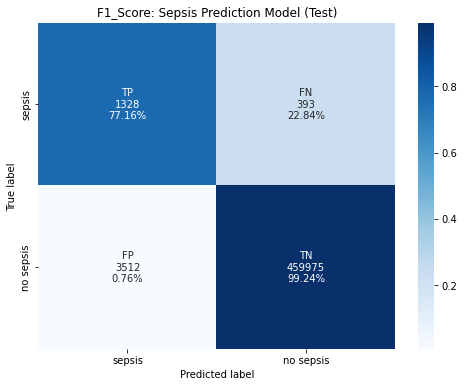

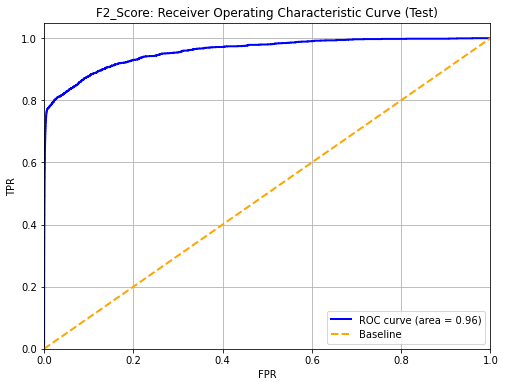

Confusion matrix : 
 [[  1331    390]
 [  3630 459857]]
Outcome values :  
TP:  1331 
FN:  390 
FP:  3630 
TN:  459857
Classification report : 
               precision    recall  f1-score   support

           1     0.2683    0.7734    0.3984      1721
           0     0.9992    0.9922    0.9956    463487

    accuracy                         0.9914    465208
   macro avg     0.6337    0.8828    0.6970    465208
weighted avg     0.9964    0.9914    0.9934    465208



Accuracy=0.991
Precision=0.268
Recall=0.773
F1 Score=0.398
F2 Score=0.562


100%|██████████| 3/3 [00:11<00:00,  3.73s/it]


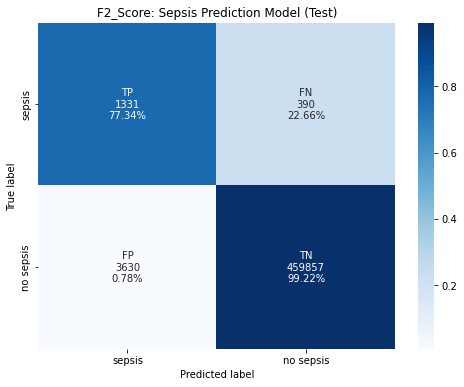

In [4]:
from sklearn.metrics import roc_curve, auc

# identify loss types used during model training
loss_types = ['Accuracy','F1_Score','F2_Score',] #'Accuracy','F1_Score','F2_Score','ROC_AUC_Score'

file_map = {'test':'test'}

# create dictionary for summarized predictions
preds = {}

# for each loss type load prediction data
for loss in tqdm(loss_types, leave=True):
    # create path to csv file
    for file in file_map:
        path = utils.create_filepath(config,'predictions',f'prediction_results_{file}_hourly.csv',RUN=RUN, OBJECTIVE=loss, TYPE='hourly')
        preds[loss] = pd.read_csv(path, index_col=False, header=0,names=['pat_idx','csn','y_prob','y_pred','y_true'])


        # Plot the ROC_AUC
        filename = f'roc_auc_{file_map[file]}.png'
        save_path = utils.create_filepath(config,'images',filename,RUN=RUN, OBJECTIVE=loss)
        title = f'{loss}: Receiver Operating Characteristic Curve ({file_map[file].capitalize()})'
        viz.plot_roc_auc(preds[loss], 'y_true', 'y_prob',title=title, save_path=save_path)

        # Plot the confusion matrix    
        filename = f'cfmatrix_{file_map[file]}.png'
        save_path = utils.create_filepath(config,'images',filename,RUN=RUN, OBJECTIVE=loss)
        title = f'{loss}: Sepsis Prediction Model ({file_map[file].capitalize()})'
        viz.plot_cfmatrix(preds[loss],'y_true','y_pred',title = title,save_path=save_path)